In [1]:
# ------------------  set up logging ----------------------
import logging
from auditory_cortex.utils import set_up_logging
set_up_logging('info')

import numpy as np
import matplotlib.pylab as plt
import matplotlib as mpl
%matplotlib inline

from auditory_cortex import utils
from auditory_cortex.analyses import Correlations, STRFCorrelations

In [5]:
model_name = 'whisper_base'
identifier = 'ucsf_timit_trf_lags200_bw50_regression_improved'
mVocs=True if 'mVocs' in identifier else False
column = 'mVocs_test_cc_raw' if mVocs else 'test_cc_raw'
corr_obj = Correlations(model_name+'_' + identifier)
session = 200206
layer = 2
data = corr_obj.data[(corr_obj.data['session'] == session) &\
    (corr_obj.data['layer'] == layer) &\
    (corr_obj.data[column] >= 0.5)
    ]
print(f"Trained: {data[column].median()}")


Trained: 0.5992887027254328


In [7]:
good_channels = corr_obj.get_good_channels(session, threshold=0.5,bin_width=50)

In [ ]:
model_name = 'wav2vec2'
identifier = 'ucsf_timit_trf_lags200_bw50_regression_improved'
mVocs=True if 'mVocs' in identifier else False
corr_obj = Correlations(model_name+'_' + identifier)
# corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs)
session = 200206
layer = 6
data = corr_obj.data[(corr_obj.data['session'] == session) &\
    (corr_obj.data['layer'] == layer)
    ]
print(f"For TIMIT: ")
print(f"Trained: {data['test_cc_raw'].median()}")

identifier = 'ucsf_reset_timit_trf_lags200_bw50_regression_improved'
mVocs=True if 'mVocs' in identifier else False
corr_obj = Correlations(model_name+'_' + identifier)
# corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs)
data = corr_obj.data[(corr_obj.data['session'] == session) &\
    (corr_obj.data['layer'] == layer)
    ]
print(f"Reset: {data['test_cc_raw'].median()}")
lag=200
baseline_identifier = f"mel_wh_ucsf_timit_trf_lags{lag}_bw50_regression_improved"
baseline_identifier = 'STRF_freqs80_'+baseline_identifier
mVocs=True if 'mVocs' in identifier else False
corr_obj = STRFCorrelations(baseline_identifier)
# corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs)
data = corr_obj.data[(corr_obj.data['session'] == session)]
print(f"Baseline: {data['test_cc_raw'].median()}")


For TIMIT: 
Trained: 0.4402309742082928
Reset: 0.24424780672503676
Baseline: 0.37161435311677093


In [5]:
model_name = 'deepspeech2'
identifier = 'ucsf_timit_trf_lags300_bw50_regression_improved'
utils.check_results(
        model_name,
        identifier,
        num_sessions,
        True
    )

INFO:For 'deepspeech2', 'ucsf_timit_trf_lags300_bw50_regression_improved'


['deepspeech2_ucsf_timit_trf_lags300_bw50_regression_improved']

### Check results...

In [5]:
dataset_name = 'ucsf'
bin_width = 50
mVocs = False
shuffled = False
lag = 50
identifier = 'regression_improved'

identifier = utils.get_run_id(
        dataset_name, bin_width, identifier, mVocs=mVocs, shuffled=shuffled, lag=lag,
    )
print(identifier)

INFO:Results identifier: ucsf_timit_trf_lags50_bw50_regression_improved
ucsf_timit_trf_lags50_bw50_regression_improved


In [ ]:
# identifier = 'ucsf_timit_trf_lags300_bw20_plos_review'
# identifier = 'ucsf_mVocs_trf_lags300_bw20_plos_review'
# identifier = 'ucsf_timit_trf_lags80_bw20_plos_review'
# identifier = 'ucsf_reset_timit_trf_lags80_bw20_plos_review'
# identifier = 'ucsf_mVocs_trf_lags80_bw20_plos_review'

In [3]:
model_names = [
    # 'whisper_tiny',
    # 'whisper_base',
    # 'wav2letter_modified',
    # 'wav2vec2',
    # 'speech2text',
    # 'deepspeech2',
    # 'cochcnn9',
    'cochresnet50',
    # 'w2v2_audioset'
    ]


# identifier = 'ucsf_timit_trf_lags200_bw50_regression_improved'
# identifier = 'ucsf_reset_timit_trf_lags200_bw50_regression_improved'
identifier = 'ucsf_reset_timit_trf_lags200_bw50_regression_improved_permuted'
# identifier = 'ucsf_reset_timit_trf_lags200_bw50_regression_improved_permuted_sanity'
num_sessions = 41

# identifier = 'ucsf_mVocs_trf_lags200_bw50_regression_improved'
# identifier = 'ucsf_reset_mVocs_trf_lags200_bw50_regression_improved_permuted_sanity'
# identifier = 'ucsf_reset_mVocs_trf_lags200_bw50_regression_improved'
# num_sessions = 39

utils.check_results_across_all_layers(
    model_names,
    identifier,
    num_sessions,
    True,
)

INFO:For 'cochresnet50', 'ucsf_reset_timit_trf_lags200_bw50_regression_improved_permuted_l0'
INFO:For bin_width: 50.0 ms, sessions done: 41
INFO:For 'cochresnet50', 'ucsf_reset_timit_trf_lags200_bw50_regression_improved_permuted_l1'
INFO:For bin_width: 50.0 ms, sessions done: 41
INFO:For 'cochresnet50', 'ucsf_reset_timit_trf_lags200_bw50_regression_improved_permuted_l2'
INFO:For bin_width: 50.0 ms, sessions done: 41
INFO:For 'cochresnet50', 'ucsf_reset_timit_trf_lags200_bw50_regression_improved_permuted_l3'
INFO:For bin_width: 50.0 ms, sessions done: 41
INFO:For 'cochresnet50', 'ucsf_reset_timit_trf_lags200_bw50_regression_improved_permuted_l4'
INFO:For bin_width: 50.0 ms, sessions done: 41
INFO:For 'cochresnet50', 'ucsf_reset_timit_trf_lags200_bw50_regression_improved_permuted_l5'
INFO:For bin_width: 50.0 ms, sessions done: 41
INFO:For 'cochresnet50', 'ucsf_reset_timit_trf_lags200_bw50_regression_improved_permuted_l6'
INFO:For bin_width: 50.0 ms, sessions done: 41
INFO:All models done

In [4]:
model_names = [
    # 'whisper_tiny',
    # 'whisper_base',
    # 'wav2letter_modified',
    # 'wav2vec2',
    # 'speech2text',
    # 'deepspeech2',
    # 'cochcnn9',
    'cochresnet50',
    # 'w2v2_audioset'
    ]

identifier = 'ucsf_reset_timit_trf_lags200_bw50_regression_improved_permuted'
utils.combine_results_for_all_models(model_names, identifier)

INFO:Combining results...
INFO:Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/cochresnet50_ucsf_reset_timit_trf_lags200_bw50_regression_improved_permuted_corr_results.csv


In [5]:
model_names = [
    # 'whisper_tiny',
    # 'whisper_base',
    # 'wav2letter_modified',
    # 'wav2vec2',
    # 'speech2text',
    # 'deepspeech2',
    # 'cochcnn9',
    'cochresnet50',
    # 'w2v2_audioset'
    ]

identifier = 'ucsf_reset_timit_trf_lags200_bw50_regression_improved_permuted'
mVocs=True if 'mVocs' in identifier else False
norm_bin_width = None
for model_name in model_names:
    corr_obj = Correlations(model_name+'_' + identifier)
    corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs, norm_bin_width=norm_bin_width)

INFO:Getting normalizer dist. for sess-180413, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180420, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180501, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180502, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180613, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180622, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180627, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180717, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180719, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180720, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180724, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180728, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180730, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180731, bw-50, mVocs=False
INFO:Getting normalizer dist. for sess-180807, bw-50, mVocs=False
INFO:Getti

In [11]:
corr_obj.data['normalized_test_cc'].median()

0.7350089403150426

In [15]:
model_name = 'deepspeech2'
identifier = 'ucsf_timit_trf_lags50_bw50_plos_review'
corr_obj = Correlations(model_name+'_' + identifier)
data = corr_obj.data[(corr_obj.data['layer']==2) &\
                    (corr_obj.data['session']==200206)]
data['normalized_test_cc'].median()


0.7255144652974723

In [ ]:
model_name = 'whisper_tiny'
identifier = 'ucsf_timit_trf_lags300_bw50_regression_improved_all_layers'
num_sessions = 41

utils.check_results(
    model_name,
    identifier,
    num_sessions,
    True
)

For 'whisper_tiny', 'ucsf_timit_trf_lags300_bw50_plot_review_all_layers'
For bin_width: 50.0 ms, sessions done: 41


[None]

### Baseline...

In [2]:
dataset_name = 'ucsf'
bin_width = 20
mVocs = False
lags = [80]
identifier = 'plos_review'
results_identifier = utils.get_run_id(
            dataset_name, bin_width, identifier, mVocs=mVocs, lag=lags[0],
        )

INFO:Results identifier: ucsf_timit_trf_lags80_bw20_plos_review


In [9]:
model_name = 'STRF_freqs80'
lag = 200
bin_width = 50
identifiers = [
    # f'coch_ucsf_timit_trf_lags{lag}_bw{bin_width}_ahmed25',
    # f'coch_ucsf_mVocs_trf_lags{lag}_bw{bin_width}_ahmed25',
    f'mel_lib_ucsf_mVocs_trf_lags{lag}_bw{bin_width}_regression_improved_log10',
    f'mel_lib_ucsf_timit_trf_lags{lag}_bw{bin_width}_regression_improved_log10',
    ]

for identifier in identifiers:
    if 'timit' in identifier:
        num_sessions = 41
    else:
        num_sessions = 39
    utils.check_results(
        model_name,
        identifier,
        num_sessions,
        True
    )

INFO:For 'STRF_freqs80', 'mel_lib_ucsf_mVocs_trf_lags200_bw50_regression_improved_log10'
INFO:For bin_width: 50.0 ms, sessions done: 39
INFO:For 'STRF_freqs80', 'mel_lib_ucsf_timit_trf_lags200_bw50_regression_improved_log10'
INFO:For bin_width: 50.0 ms, sessions done: 41


In [10]:
model_name = 'STRF_freqs80'
# identifier = 'mel_ucsf_mVocs_trf_lags50_bw50_plos_review'
lag = 200
bin_width = 50
identifiers = [
    # f'coch_ucsf_timit_trf_lags{lag}_bw{bin_width}_ahmed25',
    # f'coch_ucsf_mVocs_trf_lags{lag}_bw{bin_width}_ahmed25',
    f'mel_lib_ucsf_mVocs_trf_lags{lag}_bw{bin_width}_regression_improved_log10',
    f'mel_lib_ucsf_timit_trf_lags{lag}_bw{bin_width}_regression_improved_log10',
    ]
for identifier in identifiers:
    mVocs=True if 'mVocs' in identifier else False
    corr_obj = STRFCorrelations(model_name+'_' + identifier)
    corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs)

INFO:Getting normalizer dist. for sess-180413, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180420, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180501, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180502, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180613, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180622, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180627, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180717, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180719, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180720, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180724, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180728, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180730, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180731, bw-50, mVocs=True
INFO:Getting normalizer dist. for sess-180807, bw-50, mVocs=True
INFO:Getting normalizer d

In [9]:
corr_obj.data

,session,channel,bin_width,delay,num_freqs,tmin,tmax,lmbda,test_cc_raw,normalizer,mVocs_test_cc_raw,mVocs_normalizer,mVocs_normalized_test_cc,mVocs_null_mean,mVocs_null_std
0,180413.0,0.0,50.0,0.0,80.0,0.0,300.0,-2.0,0.0,0.0,-0.035567,-0.007198,NaN,0.004282,0.113042
1,180413.0,1.0,50.0,0.0,80.0,0.0,300.0,-2.0,0.0,0.0,-0.009055,0.002096,-0.197792,-0.007042,0.081968
2,180413.0,2.0,50.0,0.0,80.0,0.0,300.0,-1.0,0.0,0.0,0.013098,-0.001019,NaN,0.001140,0.076688
3,180413.0,3.0,50.0,0.0,80.0,0.0,300.0,-1.0,0.0,0.0,0.035057,-0.004867,NaN,-0.004299,0.074310
4,180413.0,4.0,50.0,0.0,80.0,0.0,300.0,-2.0,0.0,0.0,0.025789,-0.010654,NaN,-0.000890,0.078888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,200318.0,40.0,50.0,0.0,80.0,0.0,300.0,-2.0,0.0,0.0,0.088932,0.109254,0.269053,0.045603,0.087255
1590,200318.0,41.0,50.0,0.0,80.0,0.0,300.0,-2.0,0.0,0.0,0.084123,0.066384,0.326500,0.002156,0.069096
1591,200318.0,42.0,50.0,0.0,80.0,0.0,300.0,-2.0,0.0,0.0,0.112762,0.114778,0.332839,0.029390,0.076957
1592,200318.0,43.0,50.0,0.0,80.0,0.0,300.0,-2.0,0.0,0.0,0.084923,0.081775,0.296971,0.004187,0.076258


(-5.0, 10.0)

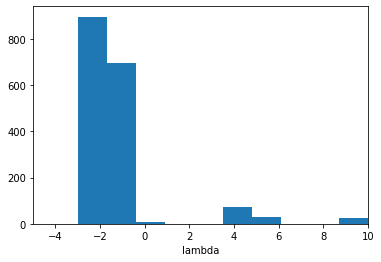

In [10]:
plt.hist(corr_obj.data['lmbda'])
plt.xlabel('lambda')
plt.xlim(-5, 10)

### merge across bin widths

In [3]:
model_names = [
    # 'whisper_tiny',
    # 'whisper_base',
    # 'wav2letter_modified',
    # 'wav2vec2',
    'speech2text',
    # 'deepspeech2',
    ]
lag=80
bin_widths = [20, 40, 60, 80, 100, 200, 300, 400, 500, 600, 700, 800]
identifiers = [f'ucsf_timit_trf_lags{lag}_bw{bw}_regression_improved_LPF_20' for bw in bin_widths]
num_sessions = 41
# num_sessions = 39

utils.check_results_across_identifiers(
    model_names,
    identifiers,
    num_sessions,
    True,
)

INFO:For 'speech2text', 'ucsf_timit_trf_lags80_bw20_regression_improved_LPF_20'
INFO:For bin_width: 20.0 ms, sessions done: 41
INFO:For 'speech2text', 'ucsf_timit_trf_lags80_bw40_regression_improved_LPF_20'
INFO:For bin_width: 40.0 ms, sessions done: 41
INFO:For 'speech2text', 'ucsf_timit_trf_lags80_bw60_regression_improved_LPF_20'
INFO:For bin_width: 60.0 ms, sessions done: 41
INFO:For 'speech2text', 'ucsf_timit_trf_lags80_bw80_regression_improved_LPF_20'
INFO:For bin_width: 80.0 ms, sessions done: 38
INFO:For 'speech2text', 'ucsf_timit_trf_lags80_bw100_regression_improved_LPF_20'
INFO:For bin_width: 100.0 ms, sessions done: 39
INFO:For 'speech2text', 'ucsf_timit_trf_lags80_bw200_regression_improved_LPF_20'
INFO:For bin_width: 200.0 ms, sessions done: 38
INFO:For 'speech2text', 'ucsf_timit_trf_lags80_bw300_regression_improved_LPF_20'
INFO:For bin_width: 300.0 ms, sessions done: 41
INFO:For 'speech2text', 'ucsf_timit_trf_lags80_bw400_regression_improved_LPF_20'
INFO:For bin_width: 400.

In [22]:
model_names = [
    'whisper_tiny',
    'whisper_base',
    'wav2letter_modified',
    'wav2vec2',
    'speech2text',
    'deepspeech2',
    ]

bin_widths = [20, 40, 60, 80, 100, 200, 300, 400, 500, 600, 700, 800]
identifiers = [f'ucsf_timit_trf_lags200_bw{bw}_regression_improved_LPF_20' for bw in bin_widths]

output_identifier = 'ucsf_timit_trf_lags200_regression_improved_LPF_20'
for model_name in model_names:
    utils.merge_correlation_results(
                model_name, identifiers, 0, output_identifier=output_identifier
            )

INFO:Combining results...
INFO:Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_tiny_ucsf_timit_trf_lags200_regression_improved_LPF_20_corr_results.csv
INFO:Combining results...
INFO:Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisper_base_ucsf_timit_trf_lags200_regression_improved_LPF_20_corr_results.csv
INFO:Combining results...
INFO:Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_ucsf_timit_trf_lags200_regression_improved_LPF_20_corr_results.csv
INFO:Combining results...
INFO:Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2vec2_ucsf_timit_trf_lags200_regression_improved_LPF_20_corr_results.csv
INFO:Combining results...
INFO:Output saved at: 
 /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_ucsf_timit_trf_lags200_regression_improved_LPF_20_

In [6]:
model_names = [
    'whisper_tiny',
    'whisper_base',
    'wav2letter_modified',
    'wav2vec2',
    'speech2text',
    'deepspeech2',
    ]

identifier = 'ucsf_timit_trf_lags200_regression_improved_LPF_20'
mVocs=True if 'mVocs' in identifier else False
norm_bin_width = 20
for model_name in model_names:
    corr_obj = Correlations(model_name+'_' + identifier)
    corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs, norm_bin_width=norm_bin_width)

INFO:Getting normalizer dist. for sess-180413, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180420, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180501, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180502, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180613, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180622, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180627, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180717, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180719, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180720, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180724, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180728, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180730, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180731, bw-20, mVocs=False
INFO:Getting normalizer dist. for sess-180807, bw-20, mVocs=False
INFO:Getti

### Using new normalizers...

In [2]:
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	]
mVocs = False
norm_bin_width = 20
trained_identifier = 'timit_trf_lags300_LPF_20'
for model_name in model_names:
    corr_obj = Correlations(model_name+'_' + trained_identifier)
    corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs, norm_bin_width=norm_bin_width)

Columns: 'normalizer', 'test_cc_raw', 'normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_timit_trf_lags300_LPF_20_corr_results.csv
Columns: 'normalizer', 'test_cc_raw', 'normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2vec2_timit_trf_lags300_LPF_20_corr_results.csv
Columns: 'normalizer', 'test_cc_raw', 'normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/speech2text_timit_trf_lags300_LPF_20_corr_results.csv
Columns: 'normalizer', 'test_cc_raw', 'normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/whisp

In [2]:
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	]
# model_name = 'wav2letter_modified'
mVocs = False
for model_name in model_names:
    trained_identifier = 'timit_trf_lags300_bw50_naplib_matched'
    corr_obj = Correlations(model_name+'_' + trained_identifier)
    corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs)

    untrained_identifiers = f'reset_{trained_identifier}'
    corr_obj = Correlations(model_name+'_' + untrained_identifiers)
    corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs)

Columns: 'normalizer', 'test_cc_raw', 'normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_timit_trf_lags300_bw50_naplib_matched_corr_results.csv
Columns: 'normalizer', 'test_cc_raw', 'normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_reset_timit_trf_lags300_bw50_naplib_matched_corr_results.csv
Columns: 'normalizer', 'test_cc_raw', 'normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2vec2_timit_trf_lags300_bw50_naplib_matched_corr_results.csv
Columns: 'normalizer', 'test_cc_raw', 'normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/audit

In [3]:
trained_identifier = 'timit_trf_lags300_bw50_naplib_matched'
baseline_identifier = f"STRF_freqs80_mel_{trained_identifier}"
mVocs = False
corr_obj = STRFCorrelations(baseline_identifier)
corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs)

Columns: 'normalizer', 'test_cc_raw', 'normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_mel_timit_trf_lags300_bw50_naplib_matched_corr_results.csv


In [4]:
model_names = [
	'wav2letter_modified',
	'wav2vec2',
	'speech2text',
	'whisper_tiny',
	'whisper_base',
	'deepspeech2',
	]
mVocs = True
trained_identifier = 'mVocs_trf_lags300_bw50_naplib_matched'
untrained_identifiers = f'reset_{trained_identifier}'
for model_name in model_names:
    
    corr_obj = Correlations(model_name+'_' + trained_identifier)
    corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs)
    
    corr_obj = Correlations(model_name+'_' + untrained_identifiers)
    corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs)

Columns: 'mVocs_normalizer', 'mVocs_test_cc_raw', 'mVocs_normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_mVocs_trf_lags300_bw50_naplib_matched_corr_results.csv
Columns: 'mVocs_normalizer', 'mVocs_test_cc_raw', 'mVocs_normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2letter_modified_reset_mVocs_trf_lags300_bw50_naplib_matched_corr_results.csv
Columns: 'mVocs_normalizer', 'mVocs_test_cc_raw', 'mVocs_normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/wav2vec2_mVocs_trf_lags300_bw50_naplib_matched_corr_results.csv
Columns: 'mVocs_normalizer', 'mVocs_test_cc_raw', 'mVocs_normalized_test_cc' updated using normalizer (ra

In [5]:
trained_identifier = 'mVocs_trf_lags300_bw50_naplib_matched'
baseline_identifier = f"STRF_freqs80_wavlet_{trained_identifier}"
mVocs = True
corr_obj = STRFCorrelations(baseline_identifier)
corr_obj.set_normalizers_using_bootsrap(mVocs=mVocs)

Columns: 'mVocs_normalizer', 'mVocs_test_cc_raw', 'mVocs_normalized_test_cc' updated using normalizer (random pairs) dist, writing back now...
Saved at /depot/jgmakin/data/auditory_cortex/results/cross_validated_correlations/STRF_freqs80_wavlet_mVocs_trf_lags300_bw50_naplib_matched_corr_results.csv


### Normalizer comarison: saved vs new

In [ ]:
model_name = 'whisper_tiny'
identifier = 'timit_trf_lags300_bw50_naplib_matched'

corr_obj = Correlations(model_name+'_' + identifier)
df = corr_obj.data

In [7]:
df.head()

,session,layer,channel,bin_width,delay,test_cc_raw,normalizer,mVocs_test_cc_raw,mVocs_normalizer,opt_lag,opt_lmbda,N_sents,layer_type,normalized_test_cc
0,180413.0,0.0,0.0,50.0,0.0,0.051807,0.004496,0.0,0.0,300.0,0.0,500.0,conv,0.772662
1,180413.0,0.0,1.0,50.0,0.0,-0.001456,0.006316,0.0,0.0,300.0,1.0,500.0,conv,-0.018317
2,180413.0,0.0,2.0,50.0,0.0,-0.025574,0.003157,0.0,0.0,300.0,1.0,500.0,conv,-0.455134
3,180413.0,0.0,3.0,50.0,0.0,0.010144,-0.012507,0.0,0.0,300.0,1.0,500.0,conv,NaN
4,180413.0,0.0,4.0,50.0,0.0,-0.000462,-0.006595,0.0,0.0,300.0,1.0,500.0,conv,NaN


In [10]:
data = df[
    (df['session'] == 200206) &\
    (df['layer'] == 2)
    ]

In [18]:
norms = data['normalizer']

In [ ]:
session = 200206
bin_width = 50
mVocs = False
norm_dist = corr_obj.norm_obj.get_normalizer_for_session(
        session, bin_width=bin_width, mVocs=mVocs
    )
norm_medians = np.median(norm_dist, axis=0)

In [17]:
norm_medians

array([0.25097622, 0.32890571, 0.13917029, 0.56912107, 0.17326105,
       0.2918712 , 0.46030923, 0.26873587, 0.29113874, 0.21068805,
       0.647463  , 0.36786901, 0.13874596, 0.68252659, 0.61410851,
       0.3923983 , 0.5186626 , 0.72329257, 0.4217438 , 0.44612987,
       0.64563929, 0.35214695, 0.25737236, 0.70592169, 0.7446956 ,
       0.34741788, 0.41862064, 0.31342134, 0.29095266, 0.51746716,
       0.53128891, 0.47919881, 0.70554329, 0.27681386, 0.48176541,
       0.42991863, 0.42570678, 0.45999061, 0.34856147, 0.15892186,
       0.35036638, 0.19818868, 0.0102433 , 0.51115786, 0.42489148,
       0.46399773, 0.28625872, 0.49133725, 0.48782523, 0.33259814,
       0.28823389, 0.45497628, 0.57397766, 0.3545949 , 0.36412039,
       0.5178511 , 0.35245469, 0.52147466, 0.59581079, 0.63785576,
       0.61171957, 0.61629325, 0.54886   , 0.42828027])

In [21]:
diff = norms - norm_medians

In [23]:
diff[np.abs(diff) > 0.01]

4774   -0.020017
4776   -0.021036
4779   -0.012046
4781   -0.010911
4784   -0.021990
4786   -0.012969
Name: normalizer, dtype: float64

In [ ]:
model_names = [
	# 'deepspeech2',
	# 'speech2text',
	# 'whisper_tiny',
	'whisper_base',
	# 'wav2vec2',
	# 'wav2letter_modified',
	# 'w2v2_generic'
	]
# identifier = 'timit_trf_lags300_bw50_naplib_matched'
identifier = 'mVocs_trf_lags300_bw50_naplib_matched'
bin_width = 50
mVocs = True
threshold = None
# fig, ax = plt.subplots()
dist_core = []
dist_non_primary = []
normalize_layer_ids=False
for i, model_name in enumerate(model_names):
	peak_layers, corr_dist = RegPlotter.get_dist_prefered_layer(
			model_name,
			identifier,
			bin_width=bin_width,
			mVocs=mVocs,
			threshold=threshold,
			normalize_layer_ids=normalize_layer_ids,
			)
	dist_core.extend(peak_layers['core'])
	dist_non_primary.extend(peak_layers['non-primary'])

